In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib as mpl


# Plotting Code for Cell-line Dilutions + Zero Purity (Sensitivity & Specificity)

## Fully clonal mixtures

In [2]:
cell_lines = ['CRL-5911', 'CRL-2314', 'CRL-5922']
cell_line = cell_lines[0]

##### Sensitivity with fully clonal mixtures

In [3]:
if cell_line in ['CRL-5922', 'CRL-2314']:
    artificial_purities_raw_df = pd.read_csv('/rnd/users/rpyke/data/00-DASH/manuscript_data_v2/validation.{0}_lohhla_sensitivity.csv'.format(cell_line),
                                             index_col=0)
else:
    artificial_purities_raw_df = pd.read_csv('/rnd/users/rpyke/data/00-DASH/manuscript_data_v2/validation.{0}_lohhla_sensitivity.csv'.format(cell_line))

artificial_purities_raw_df['LOH'] = True
artificial_purities_raw_df['real_purity'] = artificial_purities_raw_df['Sample'].str.split('_p').str[1].str.split('_').str[0].astype(int)
artificial_purities_raw_df['Sequenza_Loss'] = True
artificial_purities_raw_df.head()


,Sample,HLA_A_type1,HLA_A_type2,HLA_type1copyNum_withBAFBin,HLA_type2copyNum_withBAFBin,PVal_unique,LossAllele,KeptAllele,LOH_allele,LOHHLA_Loss,Purity,Ploidy,LOH,real_purity,Sequenza_Loss
0,DNA_VVV_S15_P10_9_tumor_p100_rep4,hla_b_07_02_01,hla_b_51_01_01,3.849064,0.000000,1.027994e-28,hla_b_51_01_01,hla_b_07_02_01,hla_b_51_01_01,True,1.00,5.0,True,100,True
1,DNA_VVV_S15_P10_9_tumor_p100_rep4,hla_c_07_02_01_01,hla_c_15_02_01,3.683698,0.000000,3.295002e-39,hla_c_15_02_01,hla_c_07_02_01_01,hla_c_15_02_01,True,1.00,5.0,True,100,True
2,DNA_VVV_S15_P10_9_tumor_p28_rep2,hla_b_07_02_01,hla_b_51_01_01,4.388693,0.269772,2.480268e-22,hla_b_51_01_01,hla_b_07_02_01,hla_b_51_01_01,True,0.15,5.0,True,28,True
3,DNA_VVV_S15_P10_9_tumor_p28_rep2,hla_c_07_02_01_01,hla_c_15_02_01,3.876131,-0.164530,2.267079e-25,hla_c_15_02_01,hla_c_07_02_01_01,hla_c_15_02_01,True,0.15,5.0,True,28,True
4,DNA_VVV_S15_P10_9_tumor_p10_rep10,hla_b_07_02_01,hla_b_51_01_01,1.750909,-0.556740,1.982009e-07,hla_b_51_01_01,hla_b_07_02_01,hla_b_51_01_01,True,0.10,2.0,True,10,True


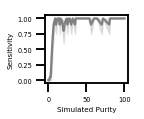

In [4]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['legend.numpoints'] = 1

artificial_purities_raw_df.groupby('real_purity').LOHHLA_Loss.mean()

plt.figure(figsize=(1.5, 1.25))
sns.set_context('talk', font_scale=0.4)

sns.lineplot(x='real_purity', y='LOHHLA_Loss', data=artificial_purities_raw_df, color='grey')

plt.xlabel('Simulated Purity')
plt.ylabel('Sensitivity')
#plt.title('DASH')
plt.savefig('/rnd/users/rpyke/data/00-DASH/figures/LOHHLA.sensitivity.purity.line.{0}.pdf'.format(cell_line),
            bbox_inches='tight')

## Sensitivity across variable clonalities - Inflated Cell-line dilutions (Sensitivity Heatmap)

In [5]:
# For us, the adjust purity is just the normal purity
if cell_line in ['CRL-5922', 'CRL-2314']:
    inflated_purities_df = pd.read_csv('/rnd/users/rpyke/data/00-DASH/manuscript_data_v2/validation.{0}_lohhla_sensitivity_with_clonality_adjustments.csv'.format(cell_line),
                                         index_col=0)
else:
    inflated_purities_df = pd.read_csv('/rnd/users/rpyke/data/00-DASH/manuscript_data_v2/validation.{0}_lohhla_sensitivity_with_clonality_adjustments.csv'.format(cell_line))

inflated_purities_df['real_purity'] = inflated_purities_df['Sample'].str.split('_p').str[1].str.split('_').str[0].astype(int)

inflated_purities_df.head()

,Sample,HLA_A_type1,HLA_A_type2,HLA_type1copyNum_withBAFBin,HLA_type2copyNum_withBAFBin,PVal_unique,LossAllele,KeptAllele,HLAtype1Log2MedianCoverage,HLAtype2Log2MedianCoverage,purity,ploidy,LOH_allele,LOHHLA_Loss,real_purity
0,DNA_VVV_S15_P10_9_tumor_p28_rep2,hla_b_07_02_01,hla_b_51_01_01,3.883982,0.865751,2.480268e-22,hla_b_51_01_01,hla_b_07_02_01,0.242642,-0.473975,0.223,5.0,NaN,False,28
1,DNA_VVV_S15_P10_9_tumor_p28_rep2,hla_c_07_02_01_01,hla_c_15_02_01,3.508391,0.547507,2.267079e-25,hla_c_15_02_01,hla_c_07_02_01_01,0.192601,-0.482873,0.223,5.0,NaN,False,28
2,DNA_VVV_S15_P10_9_tumor_p28_rep2,hla_b_07_02_01,hla_b_51_01_01,3.326220,1.516650,2.480268e-22,hla_b_51_01_01,hla_b_07_02_01,0.258454,-0.478776,0.476,5.0,NaN,False,28
3,DNA_VVV_S15_P10_9_tumor_p28_rep2,hla_c_07_02_01_01,hla_c_15_02_01,3.106763,1.325158,2.267079e-25,hla_c_15_02_01,hla_c_07_02_01_01,0.192601,-0.485471,0.476,5.0,NaN,False,28
4,DNA_VVV_S15_P10_9_tumor_p10_rep10,hla_b_07_02_01,hla_b_51_01_01,2.252697,-0.060447,1.982009e-07,hla_b_51_01_01,hla_b_07_02_01,0.031694,-0.203305,0.105,3.0,hla_b_51_01_01,True,10


### Reverse engineer getting the correct clonality & purity bucket from the stated pXX and the inflated p-value

In [6]:
# purity conversions - how to inflate
purity_conversion_df = pd.read_csv('/rnd/users/rpyke/data/00-DASH/manuscript_data_v2/validation.{0}_sequenza_conversions.csv'.format(cell_line), sep='\t')

purity_conversion_df

# How we calculated to begin with
# Get purity adjustments
purity_values = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
clonality_values = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

IPSLC_SeqIPSLC_dict = {}
IPSLC_SeqIPSLC_list = []

# **** Account for ploidy & add to tuple list ****

# Cycle through all potential combinations
for SP in purity_values:
    for clonality in clonality_values:
        IPSLC = (SP*clonality)/100
        if IPSLC == 1:
            SeqIPSLC = 0.1
        else:
            SeqIPSLC = round(purity_conversion_df[purity_conversion_df['SP'] == SP/100]['SeqSP'].mean(), 3)
        
        adjusted_ploidy = round(purity_conversion_df[purity_conversion_df['SP'] == SP/100]['SeqPloidy'].mean())
        
        IPSLC_SeqIPSLC_list.append((IPSLC, SeqIPSLC, adjusted_ploidy, SP, clonality))

purity_conversion_RE_df = pd.DataFrame(data=IPSLC_SeqIPSLC_list, columns=['IPSLC', 'SeqIPSLC', 'adjusted_ploidy', 'SP', 'clonality'])



In [7]:
# Sanity Check
#purity_conversion_RE_df.drop(columns=['Unnamed: 0'])

# use np.isclose() to get data that matches floats since rounding doesn't seem to really work
purity_conversion_RE_df[np.isclose(purity_conversion_RE_df['IPSLC'], 28, 0.001)]

# purity_conversion_RE_df.SeqIPSLC.unique()


,IPSLC,SeqIPSLC,adjusted_ploidy,SP,clonality
36,28.0,0.223,5.0,40,70
63,28.0,0.476,5.0,70,40


In [8]:
inflated_purities_df.head()

,Sample,HLA_A_type1,HLA_A_type2,HLA_type1copyNum_withBAFBin,HLA_type2copyNum_withBAFBin,PVal_unique,LossAllele,KeptAllele,HLAtype1Log2MedianCoverage,HLAtype2Log2MedianCoverage,purity,ploidy,LOH_allele,LOHHLA_Loss,real_purity
0,DNA_VVV_S15_P10_9_tumor_p28_rep2,hla_b_07_02_01,hla_b_51_01_01,3.883982,0.865751,2.480268e-22,hla_b_51_01_01,hla_b_07_02_01,0.242642,-0.473975,0.223,5.0,NaN,False,28
1,DNA_VVV_S15_P10_9_tumor_p28_rep2,hla_c_07_02_01_01,hla_c_15_02_01,3.508391,0.547507,2.267079e-25,hla_c_15_02_01,hla_c_07_02_01_01,0.192601,-0.482873,0.223,5.0,NaN,False,28
2,DNA_VVV_S15_P10_9_tumor_p28_rep2,hla_b_07_02_01,hla_b_51_01_01,3.326220,1.516650,2.480268e-22,hla_b_51_01_01,hla_b_07_02_01,0.258454,-0.478776,0.476,5.0,NaN,False,28
3,DNA_VVV_S15_P10_9_tumor_p28_rep2,hla_c_07_02_01_01,hla_c_15_02_01,3.106763,1.325158,2.267079e-25,hla_c_15_02_01,hla_c_07_02_01_01,0.192601,-0.485471,0.476,5.0,NaN,False,28
4,DNA_VVV_S15_P10_9_tumor_p10_rep10,hla_b_07_02_01,hla_b_51_01_01,2.252697,-0.060447,1.982009e-07,hla_b_51_01_01,hla_b_07_02_01,0.031694,-0.203305,0.105,3.0,hla_b_51_01_01,True,10


In [9]:
# Add mapped SP and clonality values to dataframe
inflated_purities_SP_clonality_df = inflated_purities_df.copy()

inflated_purities_list = list(round(inflated_purities_df.purity,3))
inflated_purities_real_purity_list = list(inflated_purities_df.real_purity)

SP_list = []
clonality_list = []

for inflated_purity, real_purity in zip(inflated_purities_list, inflated_purities_real_purity_list):
#     print(inflated_purity, real_purity)
    SP = purity_conversion_RE_df[(purity_conversion_RE_df.IPSLC == real_purity) & np.isclose(purity_conversion_RE_df.SeqIPSLC, inflated_purity, 0.001)]['SP'].iloc[0]
    clonality = purity_conversion_RE_df[(purity_conversion_RE_df.IPSLC == real_purity) & np.isclose(purity_conversion_RE_df.SeqIPSLC, inflated_purity, 0.001)]['clonality'].iloc[0]

#     print(SP, clonality)
    SP_list.append(SP)
    clonality_list.append(clonality)
    
inflated_purities_SP_clonality_df['SP'] = SP_list
inflated_purities_SP_clonality_df['clonality'] = clonality_list

#inflated_purities_SP_clonality_df.to_csv("/rnd/users/sdea/03-lohhla/readdata/inflated_purity_extracted_SP_clonality.csv")
inflated_purities_SP_clonality_df.head()


,Sample,HLA_A_type1,HLA_A_type2,HLA_type1copyNum_withBAFBin,HLA_type2copyNum_withBAFBin,PVal_unique,LossAllele,KeptAllele,HLAtype1Log2MedianCoverage,HLAtype2Log2MedianCoverage,purity,ploidy,LOH_allele,LOHHLA_Loss,real_purity,SP,clonality
0,DNA_VVV_S15_P10_9_tumor_p28_rep2,hla_b_07_02_01,hla_b_51_01_01,3.883982,0.865751,2.480268e-22,hla_b_51_01_01,hla_b_07_02_01,0.242642,-0.473975,0.223,5.0,NaN,False,28,40,70
1,DNA_VVV_S15_P10_9_tumor_p28_rep2,hla_c_07_02_01_01,hla_c_15_02_01,3.508391,0.547507,2.267079e-25,hla_c_15_02_01,hla_c_07_02_01_01,0.192601,-0.482873,0.223,5.0,NaN,False,28,40,70
2,DNA_VVV_S15_P10_9_tumor_p28_rep2,hla_b_07_02_01,hla_b_51_01_01,3.326220,1.516650,2.480268e-22,hla_b_51_01_01,hla_b_07_02_01,0.258454,-0.478776,0.476,5.0,NaN,False,28,70,40
3,DNA_VVV_S15_P10_9_tumor_p28_rep2,hla_c_07_02_01_01,hla_c_15_02_01,3.106763,1.325158,2.267079e-25,hla_c_15_02_01,hla_c_07_02_01_01,0.192601,-0.485471,0.476,5.0,NaN,False,28,70,40
4,DNA_VVV_S15_P10_9_tumor_p10_rep10,hla_b_07_02_01,hla_b_51_01_01,2.252697,-0.060447,1.982009e-07,hla_b_51_01_01,hla_b_07_02_01,0.031694,-0.203305,0.105,3.0,hla_b_51_01_01,True,10,10,100


In [10]:
# Sanity Check
inflated_purities_SP_clonality_df[(inflated_purities_SP_clonality_df['SP'] == 100) & (inflated_purities_SP_clonality_df['clonality'] == 10)].head()



,Sample,HLA_A_type1,HLA_A_type2,HLA_type1copyNum_withBAFBin,HLA_type2copyNum_withBAFBin,PVal_unique,LossAllele,KeptAllele,HLAtype1Log2MedianCoverage,HLAtype2Log2MedianCoverage,purity,ploidy,LOH_allele,LOHHLA_Loss,real_purity,SP,clonality
10,DNA_VVV_S15_P10_9_tumor_p10_rep10,hla_b_07_02_01,hla_b_51_01_01,2.687727,2.110815,1.982009e-07,hla_b_51_01_01,hla_b_07_02_01,0.031694,-0.203305,1.0,5.0,NaN,False,10,100,10
11,DNA_VVV_S15_P10_9_tumor_p10_rep10,hla_c_07_02_01_01,hla_c_15_02_01,2.551741,2.114139,7.096194e-06,hla_c_15_02_01,hla_c_07_02_01_01,0.050604,-0.245316,1.0,5.0,NaN,False,10,100,10
708,DNA_VVV_S15_P10_9_tumor_p10_rep4,hla_b_07_02_01,hla_b_51_01_01,2.511651,2.024622,1.056357e-07,hla_b_51_01_01,hla_b_07_02_01,0.059982,-0.235474,1.0,5.0,NaN,False,10,100,10
709,DNA_VVV_S15_P10_9_tumor_p10_rep4,hla_c_07_02_01_01,hla_c_15_02_01,2.484360,2.107710,6.341897e-06,hla_c_15_02_01,hla_c_07_02_01_01,-0.020894,-0.203309,1.0,5.0,NaN,False,10,100,10
830,DNA_VVV_S15_P10_9_tumor_p10_rep2,hla_b_07_02_01,hla_b_51_01_01,2.659074,2.213097,8.385216e-08,hla_b_51_01_01,hla_b_07_02_01,0.061076,-0.204254,1.0,5.0,NaN,False,10,100,10


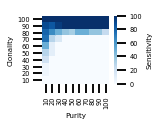

In [11]:
# Try and group by SP and clonality
tmp_df =  pd.DataFrame(inflated_purities_SP_clonality_df.groupby(['SP', 'clonality']).LOHHLA_Loss.mean().reset_index())
tmp_df.columns = ['SP', 'clonality', 'LOHHLA_Accuracy']
tmp_df

purities = list(range(10, 110, 10))
clonalities = list(range(10, 110, 10))

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['legend.numpoints'] = 1

# flip purity onto y axis 
sns.set_context('talk', font_scale=0.4)
plt.figure(figsize=(1.5, 1.25))
accuracy_matrix = []
for clonality in clonalities[::-1]:
    accuracy_array = []  
    for purity in purities:
        try:
#             print(purity, clonality)
            accuracy = list(tmp_df[(tmp_df.SP == purity) & (tmp_df.clonality == clonality)].LOHHLA_Accuracy)[0] * 100
#             print(accuracy)
            accuracy_array.append(accuracy)
        except:
            accuracy_array.append(np.nan)
    accuracy_matrix.append(accuracy_array)

sns.heatmap(accuracy_matrix, xticklabels=purities, yticklabels=clonalities[::-1], cmap="Blues",
           vmin=0, vmax=100, cbar_kws={'label': 'Sensitivity'}) #, annot=True, fmt='g')
plt.xlabel('Purity')
plt.ylabel('Clonality')
plt.savefig('/rnd/users/rpyke/data/00-DASH/figures/LOHHLA.sensitivity.purity_clonality.heatmap.lenient.blues_r.{0}.pdf'.format(cell_line),
           bbox_inches='tight')

## Specificity with full clonality (Line-plot)

In [12]:
if cell_line in ['CRL-5922', 'CRL-2314']:
    artificial_purities_raw_df = pd.read_csv('/rnd/users/rpyke/data/00-DASH/manuscript_data_v2/validation.{0}_lohhla_specificity.csv'.format(cell_line),
                                         index_col=0)
else:
    artificial_purities_raw_df = pd.read_csv('/rnd/users/rpyke/data/00-DASH/manuscript_data_v2/validation.{0}_lohhla_specificity.csv'.format(cell_line))
artificial_purities_raw_df['LOH'] = True
artificial_purities_raw_df['real_purity'] = artificial_purities_raw_df['Sample'].str.split('_p').str[1].str.split('_').str[0].astype(int)
    
# Fixing purity
artificial_purities_raw_df['old_purity'] = artificial_purities_raw_df['Purity']

artificial_purities_raw_df.head()

,Sample,HLA_A_type1,HLA_A_type2,HLA_type1copyNum_withBAFBin,HLA_type2copyNum_withBAFBin,PVal_unique,LossAllele,KeptAllele,LOH_allele,LOHHLA_Loss,Purity,Ploidy,LOH,real_purity,old_purity
0,DNA_VVV_S15_P10_9_tumor_p0_rep1_4,hla_b_07_02_01,hla_b_51_01_01,0.998497,0.989843,0.027355,hla_b_51_01_01,hla_b_07_02_01,NaN,False,4,5,True,0,4
1,DNA_VVV_S15_P10_9_tumor_p0_rep1_4,hla_c_07_02_01_01,hla_c_15_02_01,0.981784,0.977126,0.110290,hla_c_07_02_01_01,hla_c_15_02_01,NaN,False,4,5,True,0,4
2,DNA_VVV_S15_P10_9_tumor_p0_rep1_49,hla_b_07_02_01,hla_b_51_01_01,0.999877,0.999171,0.027355,hla_b_51_01_01,hla_b_07_02_01,NaN,False,49,5,True,0,49
3,DNA_VVV_S15_P10_9_tumor_p0_rep1_49,hla_c_07_02_01_01,hla_c_15_02_01,0.998513,0.998133,0.110290,hla_c_07_02_01_01,hla_c_15_02_01,NaN,False,49,5,True,0,49
4,DNA_VVV_S15_P10_9_tumor_p0_rep1_80,hla_b_07_02_01,hla_b_51_01_01,0.999925,0.999492,0.027355,hla_b_51_01_01,hla_b_07_02_01,NaN,False,80,5,True,0,80


In [13]:
tmp_df = pd.DataFrame(artificial_purities_raw_df)
tmp_df = tmp_df.dropna(subset=['LOHHLA_Loss'])
tmp_df.LOHHLA_Loss.unique()
tmp_df['HLA_LOH_Loss_int'] = tmp_df['LOHHLA_Loss'].astype(int)
tmp_df = pd.DataFrame(tmp_df.groupby('old_purity').HLA_LOH_Loss_int.mean().reset_index())
tmp_df.head()

,old_purity,HLA_LOH_Loss_int
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [14]:
tmp_df['old_purity'] = tmp_df.old_purity.astype(int)

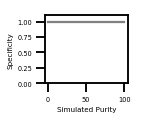

In [15]:
tmp_df['HLA_LOH_Loss_int'] = 1 - tmp_df['HLA_LOH_Loss_int']

plt.figure(figsize=(1.5, 1.25))
sns.set_context('talk', font_scale=0.4)

sns.lineplot(x='old_purity', y='HLA_LOH_Loss_int', data=tmp_df, color='grey')
plt.ylim(0, 1.1)
plt.xlabel('Simulated Purity')
plt.ylabel('Specificity')
#plt.title('DASH')
plt.savefig('/rnd/users/rpyke/data/00-DASH/figures/LOHHLA.specificity.zero_purity.line.{0}.pdf'.format(cell_line), bbox_inches='tight')

# Purity + clonality Specificity (specificity heatmap)

In [16]:
inflated_zero_purities_df = pd.read_csv('/rnd/users/rpyke/data/00-DASH/manuscript_data_v2/validation.{0}_lohhla_specificity_with_clonality_adjustments.csv'.format(cell_line))
inflated_zero_purities_df

# get the old purities from the name of the sample & convert to int
inflated_zero_purities_df['old_purity'] = inflated_zero_purities_df['Sample'].str.split("_").str[-1]
inflated_zero_purities_df['old_purity'] = pd.to_numeric(inflated_zero_purities_df['old_purity'], downcast='signed')
inflated_zero_purities_df.old_purity.unique()


array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  12,  14,  16,
        18,  20,  15,  21,  24,  27,  30,  28,  32,  36,  40,  25,  35,
        45,  50,  42,  48,  54,  60,  49,  56,  63,  70,  64,  72,  80,
        81,  90, 100])

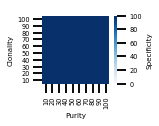

In [17]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['legend.numpoints'] = 1

purities = list(range(10, 110, 10))
clonalities = list(range(10, 110, 10))

tmp_df = pd.DataFrame(inflated_zero_purities_df.groupby('old_purity').LOHHLA_Loss.mean()).reset_index()
tmp_df.columns = ['simulated_purity', 'LOHHLA_Accuracy']
tmp_df['LOHHLA_Specificity'] = 1 - tmp_df.LOHHLA_Accuracy # Inverted for specificity (these are negatives)

# print(tmp_df)

sns.set_context('talk', font_scale=0.4)
plt.figure(figsize=(1.5, 1.25))
accuracy_matrix = []
for purity in purities[::-1]:
    accuracy_array = []
    for clonality in clonalities:
        try:
            accuracy_array.append(list(tmp_df[tmp_df.simulated_purity == 
                                              int(clonality*purity / 100)].LOHHLA_Specificity)[0] * 100)
        except:
            accuracy_array.append(np.nan)
    accuracy_matrix.append(accuracy_array)

sns.heatmap(accuracy_matrix, xticklabels=purities, yticklabels=clonalities[::-1], cmap="Blues",
           vmin=0, vmax=100, cbar_kws={'label': 'Specificity'}) #, annot=True, fmt='g')
plt.xlabel('Purity')
plt.ylabel('Clonality')
#plt.title('Updated Algorithm')
plt.savefig('/rnd/users/rpyke/data/00-DASH/figures/LOHHLA.specificity.purity_clonality.heatmap.lenient.blues_r.{0}.pdf'.format(cell_line),
           bbox_inches='tight')